In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
import seaborn as sns

from heatmap import make_heatmap, matricize_df
import viz_helpers

# Seaborn style defaults. Relevant changes for us are default font, and no ticks for heatmaps
sns.set_theme()

pd.set_option('display.max_rows', 100)
pd.options.display.precision = 3

# Default (all reddit) counts
df = viz_helpers.load_df(wikt=False)

mat = matricize_df(df)
df.head(5)

,pre,suff,count
0,cum,wad,372.0
1,cum,bag,1608.0
2,cum,bucket,4441.0
3,cum,sack,212.0
4,cum,ball,654.0


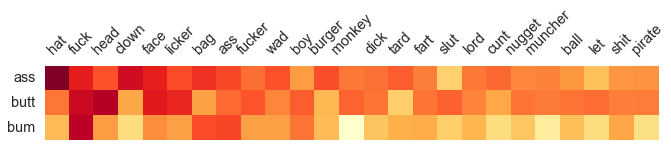

In [2]:
def suffixes_for_pres(pres, n):
    sub = df[df.pre.isin(pres)]
    suffcounts = sub.groupby('suff')['count'].sum()
    return suffcounts.sort_values(ascending=False).head(n).index

def pres_heatmap(pres, ncols, controls=(), **kwargs):
    suffs = suffixes_for_pres(pres, ncols)
    sub = df[
        (df.pre.isin(pres) | df.pre.isin(controls))
        &
        (df.suff.isin(suffs))
    ]
    return make_heatmap(sub, **kwargs)

butts = ['butt', 'ass', 'bum']
buttsuff = suffixes_for_pres(butts, 10)

fig, ax = pres_heatmap(butts, 25,
             figsize=(11, 11),
             #controls=['cock', 'dirt', 'lib',],
             sort=1,
             cbar=False,
             return_fig=True,
             cmap='YlOrRd',
            );

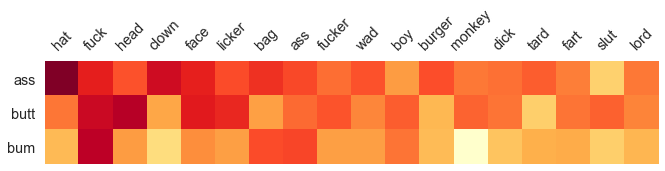

In [8]:
fig, ax = pres_heatmap(butts, 18,
             figsize=(11, 11),
             #controls=['cock', 'dirt', 'lib',],
             sort=1,
             cbar=False,
             return_fig=True,
             cmap='YlOrRd',
            );

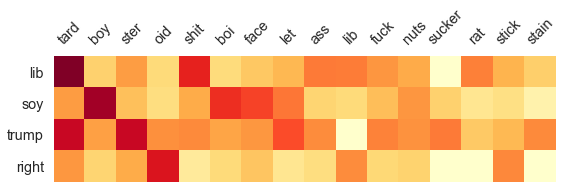

In [4]:
poli_pres = ['lib', 'right', 'soy', 'trump',]

fig, ax = pres_heatmap(poli_pres, 16,
             figsize=(9, 11),
             #controls=['cock', 'dirt', 'lib',],
             sort=1,
             cbar=False,
             return_fig=True,
             cmap='YlOrRd',
            );
viz_helpers.savefig(fig, 'politics_matrix', bbox_inches='tight');

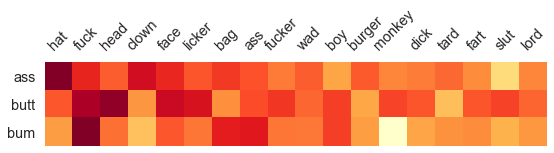

In [9]:
fig, ax = pres_heatmap(butts, 18,
             figsize=(9, 11),
             #controls=['cock', 'dirt', 'lib',],
             sort=1,
             cbar=False,
             return_fig=True,
             cmap='YlOrRd',
             normalize_rows=True,
            );
viz_helpers.savefig(fig, 'butt_matrix', bbox_inches='tight');

In [4]:
mat.mean(axis=1).head()

pre
ass        9955.935
bastard       2.630
bird        276.671
bitch       925.027
bum        1484.197
dtype: float64

In [14]:
import requests

def get_count(term):
    resp = requests.get(f'https://api.pushshift.io/reddit/comment/search?limit=100&q={term}')
    comms = resp.json()['data']
    return len(comms)

get_count('asslut')

31

In [24]:
get_count("baby hairs are")

100

In [18]:
get_count('bumonkey')

0